In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D



import numpy as np
import matplotlib.pyplot as plt
import os 
import cv2


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
DATADIR = "drive/My Drive/AML_plankton_project/train_images "
CATEGORIES = [str(i) for i in range(121)]

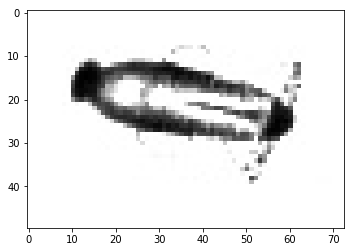

In [0]:
# IMG_SIZE = 95


# plt.imshow(new_array, cmap = "gray")

In [0]:
IMG_SIZE = 95

training_data = []

def create_training_data():
    for index, category in enumerate(CATEGORIES,0):
        # print(DATADIR, category)
        path = os.path.join(DATADIR, category) 
        class_num = index
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array,(IMG_SIZE, IMG_SIZE))
            training_data.append([new_array, class_num])
            
create_training_data()
        

In [0]:
print(len(training_data))

print(training_data[0])

24222
[array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8), 0]


In [0]:
import random 

random.shuffle(training_data)

In [0]:
for sample in training_data[:10]:
    print(sample[1])

12
99
94
101
26
42
119
58
100
42


In [0]:

X = []
y = []

class_weight = {}

for features, label in training_data:
    
    X.append(features)
    
    one_hot = [0 for i in range(121)]
    one_hot[label] = 1
    
    y.append(one_hot)
    
    if label in class_weight:
      class_weight[label] += 1.0
      
    else:
      class_weight[label] = 1.0
      
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1) 
y = np.array(y)

# create class weights
for class_num in class_weight:
  class_weight[class_num] = 1 - (class_weight[class_num] / len(y))
  

In [0]:
print(y[0])

[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0]


In [0]:
X = X/225.0 # normalize

In [0]:
model = Sequential()
N_Classes = 121

# model.add(InputLayer())
model.add(Conv2D(64,(3,3),padding = "same", input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), padding = "same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), padding = "same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(100))
model.add(Dense(N_Classes, activation='softmax'))

model.compile(loss = "categorical_crossentropy",
             optimizer = "adam",
             metrics = ["accuracy"])



model.fit(X, y, batch_size = 64, epochs = 10, validation_split = 0.1, class_weight = class_weight)

Train on 21799 samples, validate on 2423 samples
Epoch 1/10
21799/21799 [==============================] - 23s 1ms/step - loss: 3.4198 - acc: 0.2205 - val_loss: 2.6328 - val_acc: 0.3533
Epoch 2/10
21799/21799 [==============================] - 23s 1ms/step - loss: 2.4351 - acc: 0.3787 - val_loss: 2.4388 - val_acc: 0.3946
Epoch 3/10
21799/21799 [==============================] - 22s 1ms/step - loss: 2.1746 - acc: 0.4295 - val_loss: 2.2460 - val_acc: 0.4259
Epoch 4/10
21799/21799 [==============================] - 22s 1ms/step - loss: 2.0171 - acc: 0.4646 - val_loss: 2.1533 - val_acc: 0.4457
Epoch 5/10
21799/21799 [==============================] - 22s 1ms/step - loss: 1.9118 - acc: 0.4852 - val_loss: 2.0868 - val_acc: 0.4631
Epoch 6/10
21799/21799 [==============================] - 22s 1ms/step - loss: 1.8330 - acc: 0.5008 - val_loss: 2.0904 - val_acc: 0.4705
Epoch 7/10
21799/21799 [==============================] - 22s 1ms/step - loss: 1.7520 - acc: 0.5185 - val_loss: 2.0815 - val_acc:

In [0]:
model.fit(X, y, batch_size = 64, epochs = 5, validation_split = 0.1)

Train on 21799 samples, validate on 2423 samples
Epoch 1/5
21799/21799 [==============================] - 22s 1ms/step - loss: 1.1338 - acc: 0.6716 - val_loss: 2.0572 - val_acc: 0.4998
Epoch 2/5
21799/21799 [==============================] - 22s 1ms/step - loss: 0.8228 - acc: 0.7493 - val_loss: 2.2229 - val_acc: 0.5002
Epoch 3/5
21799/21799 [==============================] - 22s 1ms/step - loss: 0.7509 - acc: 0.7655 - val_loss: 2.2218 - val_acc: 0.5056
Epoch 4/5
21799/21799 [==============================] - 22s 1ms/step - loss: 0.7298 - acc: 0.7712 - val_loss: 2.2948 - val_acc: 0.5056
Epoch 5/5
21799/21799 [==============================] - 22s 1ms/step - loss: 0.6814 - acc: 0.7875 - val_loss: 2.2821 - val_acc: 0.5163


In [0]:
from keras.preprocessing.image import ImageDataGenerator 

train_generator = ImageDataGenerator(
    
    rotation_range = 360,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    vertical_flip = True,
    fill_mode = 'nearest'

)

val_generator = ImageDataGenerator(
    
    horizontal_flip = True,
    vertical_flip = True,

)

train_generator.fit(X) # computes quantities required for featurewise normalization

N_epochs = 3
Batch_size = 64

# fits the model on batches with real-time data augmentation:
model.fit_generator(train_generator.flow(X, y, batch_size = Batch_size),
                    steps_per_epoch=len(X) / Batch_size, epochs = N_epochs)
    

Epoch 1/3
379/378 [==============================] - 30s 79ms/step - loss: 2.9305 - acc: 0.2712
Epoch 2/3
379/378 [==============================] - 31s 83ms/step - loss: 2.7652 - acc: 0.2984
Epoch 3/3
379/378 [==============================] - 30s 80ms/step - loss: 2.7195 - acc: 0.3060


In [0]:
model.fit_generator(train_generator.flow(X, y, batch_size = Batch_size),
                    steps_per_epoch=len(X) / Batch_size, epochs = N_epochs)
    

Epoch 1/3
379/378 [==============================] - 31s 81ms/step - loss: 3.2255 - acc: 0.2306
Epoch 2/3
379/378 [==============================] - 31s 81ms/step - loss: 2.8592 - acc: 0.2826
Epoch 3/3
379/378 [==============================] - 31s 81ms/step - loss: 2.7500 - acc: 0.3025


# Test and Write

In [0]:
from PIL import Image

directory_in_str = "drive/My Drive/AML_plankton_project/test_images/test"


results = list()


for file in os.listdir(directory_in_str):
    if file.endswith(".jpg"):
        
        filename = os.fsdecode(file)
        image_path = os.path.join(directory_in_str, filename)
        
        img_array = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(img_array,(IMG_SIZE, IMG_SIZE))
        norm_array = new_array / 255
        norm_array = np.array(norm_array).reshape(-1,IMG_SIZE, IMG_SIZE, 1) 
        prediction = model.predict_classes(norm_array)
        
        results.append([filename, prediction[0]])
        
        

# print(results)            
test_results = pd.DataFrame(results, columns= ["image","class"])

print(test_results)


In [0]:
test_results.to_csv('output_eerste_keras.csv', index=False)

In [0]:
from google.colab import files

files.download("output_eerste_keras.csv")